# Novel compressor submission: Boussif Oussama

In [23]:
import math
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

# NLTK
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords  
import nltk
from nltk.sentiment.vader import SentiText, SentimentIntensityAnalyzer

In [167]:
with open('novel', 'r') as f:
    text = "".join([line for line in f.readlines()])

In [168]:
sentences = sent_tokenize("".join(text))

## Sentiment analysis

In [169]:
sent = SentimentIntensityAnalyzer()

In [170]:
neg = []
neutral = []
pos = []
for sentence in sentences:
    summary = sent.polarity_scores(sentence)
    neg.append(summary['neg'])
    neutral.append(summary['neu'])
    pos.append(summary['pos'])

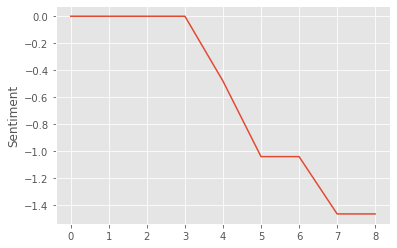

In [171]:
plt.plot(np.cumsum(pos)-np.cumsum(neg))
plt.ylabel('Sentiment')
plt.show()

In [172]:
print("".join(sentences[3:]))

He
managed to slaughter the first two.Why would he stop short of murdering the animal?Eventually he stuck the poor
soul.Here he lays, unable to move.Did that feat anger his Gods?He finally beat the hypnosis.


In [126]:
def _create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix

In [127]:
def _create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table

    return tf_matrix
def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table
def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

In [128]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

In [129]:
def _score_sentences(tf_idf_matrix) -> dict:

    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue
def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    average = (sumValues / len(sentenceValue))

    return average
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary.strip()

In [130]:
def count_words(text):
    filtered = [a for a in text.strip().split() if a[0].isalnum()]
    return len(filtered)

In [162]:
total_documents = len(sentences)
freq_matrix = _create_frequency_matrix(sentences)


tf_matrix = _create_tf_matrix(freq_matrix)

count_doc_per_words = _create_documents_per_words(freq_matrix)

idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)

tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)

In [166]:
sentence_scores = _score_sentences(tf_idf_matrix)

threshold = _find_average_score(sentence_scores)

summary = _generate_summary(sentences, sentence_scores,  1.25 * threshold)
print(summary)
print(count_words(summary))

It’s dark. Jaccard woke up. He fell through the stairs and went unconscious. He
managed to slaughter the first two. Why would he stop short of murdering the animal? Eventually he stuck the poor
soul. Here he lays, unable to move. Did that feat anger his Gods? He finally beat the hypnosis.
52


In [94]:
threshold

0.11857643744526535